## Exploratory Data Analysis (EDA) and visualizations

This notebook focuses on the Exploratory Data Analysis (EDA) and visualizations for the Student Success Services dataset. It builds on the work completed in Notebook 1, where the raw data from the California Community Colleges Data Mart was cleaned, standardized, and transformed into a structured format suitable for analysis.

Here, I will explore trends, patterns, and relationships across services and terms to better understand how student support participation has evolved over time.

## Imports & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)




## Load Cleaned Dataset + Basic Preview

I will load the master_dataset_annual.csv file that was created in Notebook 1. This file contains 11 years of merged data with Service participation counts, Student headcount, Program awards and normalized rates (all metrics per 1,000 students.)

In [4]:
# Load the master dataset
df = pd.read_csv('master_dataset_annual.csv')

# Basic size of the dataset
print("DATASET OVERVIEW")
print("----------------")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Look at the first few rows
print("\nFIRST 3 ROWS (most recent years)")
df.head(3)

DATASET OVERVIEW
----------------
Number of rows: 11
Number of columns: 41

FIRST 3 ROWS (most recent years)


,academic_year,assessment,counseling,ed_plan,noncredit_assessment,noncredit_counseling,noncredit_ed_plan,noncredit_orientation,noncredit_other,orientation,other_services,probation,total_services,student_count,total_awards,assessment_rate,counseling_rate,ed_plan_rate,noncredit_assessment_rate,noncredit_counseling_rate,noncredit_ed_plan_rate,noncredit_orientation_rate,noncredit_other_rate,orientation_rate,other_services_rate,probation_rate,total_services_rate,award_rate,assessment_rate_rate,counseling_rate_rate,ed_plan_rate_rate,noncredit_assessment_rate_rate,noncredit_counseling_rate_rate,noncredit_ed_plan_rate_rate,noncredit_orientation_rate_rate,noncredit_other_rate_rate,orientation_rate_rate,other_services_rate_rate,probation_rate_rate,total_services_rate_rate,award_rate_rate
0,2014-2015,7952,17334,12672,0,0,0,0,0,5866,15505,239,59568,70197,3822,113.281194,246.933630,180.520535,0.000000,0.000000,0.0,0.0,0.000000,83.564825,220.878385,3.404704,848.583273,54.446771,1.613761,3.517723,2.571627,0.000000,0.000000,0.0,0.0,0.000000,1.190433,3.146550,0.048502,12.088597,0.775628
1,2015-2016,12146,30146,22125,0,0,0,0,0,8273,20572,307,93569,65855,3180,184.435502,457.763268,335.965378,0.000000,0.000000,0.0,0.0,0.000000,125.624478,312.383266,4.661757,1420.833650,48.287905,2.800630,6.951078,5.101593,0.000000,0.000000,0.0,0.0,0.000000,1.907592,4.743501,0.070788,21.575183,0.733246
2,2016-2017,10723,20325,11992,33,33,0,0,394,8415,13438,100,65453,63345,2885,169.279343,320.861946,189.312495,0.520957,0.520957,0.0,0.0,6.219907,132.843950,212.139869,1.578657,1033.278080,45.544242,2.672339,5.065308,2.988594,0.008224,0.008224,0.0,0.0,0.098191,2.097150,3.348960,0.024922,16.311912,0.718987


The dataset I am using represents 11 years of student support service activity at City College of San Francisco, covering the period from 2014 to 2025. Each row in the dataset shows how many students received a particular support service—such as counseling, education planning, assessment, or orientation—during each academic term (Fall, Spring, or Summer).

The preview of the data confirms that it loaded correctly, the columns are in the right format, and the service categories are consistent with my expectations. I think this gives a clean foundation to begin the exploratory data analysis (EDA), where I can visualize trends, compare services, and look for patterns that may help explain student success outcomes.

### Initial Exploratory Checks

Before creating any visualizations, it is important to verify that the dataset is complete, consistent, and structured correctly. This section performs several quick exploratory checks to help confirm the overall health of the data:

Missing values: Ensures that all four key columns—year, term, service, and count—are fully populated and that no data is unintentionally omitted.

Unique categories: Lists all services and academic terms represented in the dataset. This helps confirm that the cleaning pipeline preserved all expected categories.

Summary statistics: Provides an overview of the distribution of student counts across services and terms. This helps identify whether the dataset is balanced, skewed, or contains extreme values.

Dataset size: Shows the total number of rows, which confirms that all years and terms loaded correctly and match the expected structure.

In [7]:
print("BASIC DATA CHECKS")

# -----------------------------------------
# 1) OUTLIERS (IQR RULE) for all *_rate columns
# -----------------------------------------
rate_cols = [c for c in df.columns if c.endswith("_rate") and c != "award_rate_rate"]

print("\n1) Outliers using IQR (simple rule)")
for col in rate_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    if not outliers.empty:
        years = outliers["academic_year"].tolist()
        values = outliers[col].round(2).tolist()
        print(f"- {col}: {len(outliers)} outlier(s)")
        print(f"  Years: {years}")
        print(f"  Values: {values}")



BASIC DATA CHECKS

1) Outliers using IQR (simple rule)
- assessment_rate: 2 outlier(s)
  Years: ['2022-2023', '2024-2025']
  Values: [712.41, 888.14]
- noncredit_assessment_rate: 2 outlier(s)
  Years: ['2016-2017', '2024-2025']
  Values: [0.52, 0.04]
- noncredit_counseling_rate: 2 outlier(s)
  Years: ['2016-2017', '2017-2018']
  Values: [0.52, 0.03]
- noncredit_other_rate: 2 outlier(s)
  Years: ['2018-2019', '2019-2020']
  Values: [18.06, 17.66]
- other_services_rate: 2 outlier(s)
  Years: ['2020-2021', '2023-2024']
  Values: [673.39, 1580.9]
- assessment_rate_rate: 2 outlier(s)
  Years: ['2022-2023', '2024-2025']
  Values: [18.02, 19.18]
- noncredit_assessment_rate_rate: 2 outlier(s)
  Years: ['2016-2017', '2024-2025']
  Values: [0.01, 0.0]
- noncredit_counseling_rate_rate: 2 outlier(s)
  Years: ['2016-2017', '2017-2018']
  Values: [0.01, 0.0]
- noncredit_other_rate_rate: 2 outlier(s)
  Years: ['2018-2019', '2019-2020']
  Values: [0.26, 0.29]
- other_services_rate_rate: 2 outlier(s)
 

An IQR-based outlier analysis identified a small number of extreme values across several service rate variables. These outliers primarily correspond to post-COVID academic years and noncredit services with very low baseline enrollment. Rather than data errors, these values reflect structural enrollment shifts and pandemic-related disruptions. No outliers were removed; instead, anomalous years were considered separately during modeling.

## Total Service Utilization Trend

I want to see the big picture view of oveall service delivery trends at CCSF so I am doing a time-series line plot to visualize how total service participation has changed across the 11 academic years. 

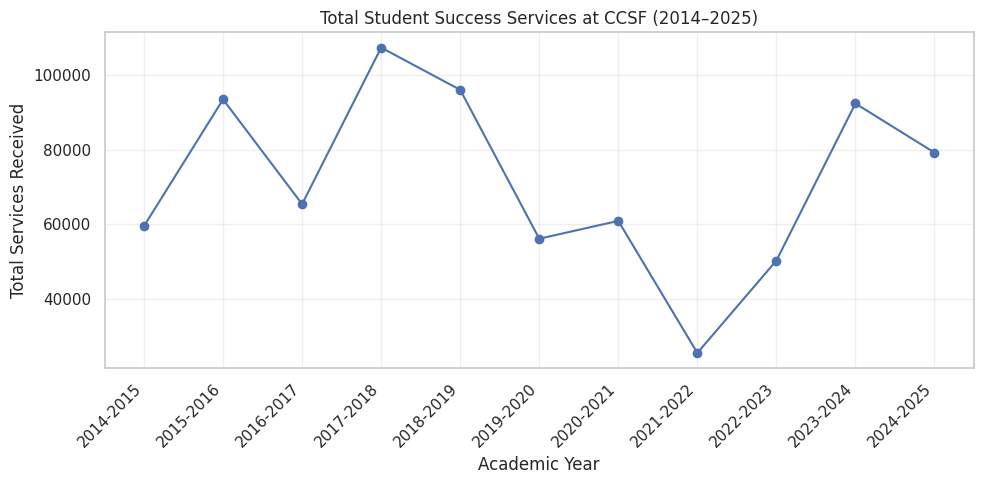

SUMMARY
-------
Min year: 2021-2022 = 25,492
Max year: 2017-2018 = 107,481
Overall change: +33.1% (first year → last year)


In [11]:
# 1) Line plot: total services by academic year
plt.figure(figsize=(10, 5))
plt.plot(df["academic_year"], df["total_services"], marker="o")

plt.title("Total Student Success Services at CCSF (2014–2025)")
plt.xlabel("Academic Year")
plt.ylabel("Total Services Received")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2) Quick “big picture” summary numbers
first = df.iloc[0]["total_services"]
last = df.iloc[-1]["total_services"]
change_pct = ((last - first) / first) * 100

print("SUMMARY")
print("-------")
print("Min year:", df.loc[df["total_services"].idxmin(), "academic_year"],
      "=", f'{df["total_services"].min():,.0f}')
print("Max year:", df.loc[df["total_services"].idxmax(), "academic_year"],
      "=", f'{df["total_services"].max():,.0f}')
print(f"Overall change: {change_pct:+.1f}% (first year → last year)")


This time-series plot shows the total number of student success services delivered at CCSF per academic year, not the number of unique students or total enrollment. Each point represents the aggregate count of services received, meaning a single student may be counted multiple times if they used multiple services.

The visualization reveals substantial year-to-year variation in service utilization. Total services peaked in 2017–2018 (107,481 services) and reached their lowest level in 2021–2022 (25,492 services). The sharp decline during the COVID-19 period reflects major disruptions to in-person instruction, student engagement, and service delivery.

Although service utilization dropped dramatically during the pandemic, the post-COVID years show a partial recovery, with total services increasing again by 2023–2024 and remaining higher in 2024–2025 than in the early pandemic years. Overall, total service usage increased by 33.1% from the first to the last year, indicating long-term growth despite short-term shocks.

### Individual Service Trends


I want to put several service trends on one chart so I can compare them across the same 11 years. This helps me quickly see which services are high, low, steady, or volatile, so I can decide which ones are worth focusing on in my modeling (counseling, education planning, orientation, assessment, probation).

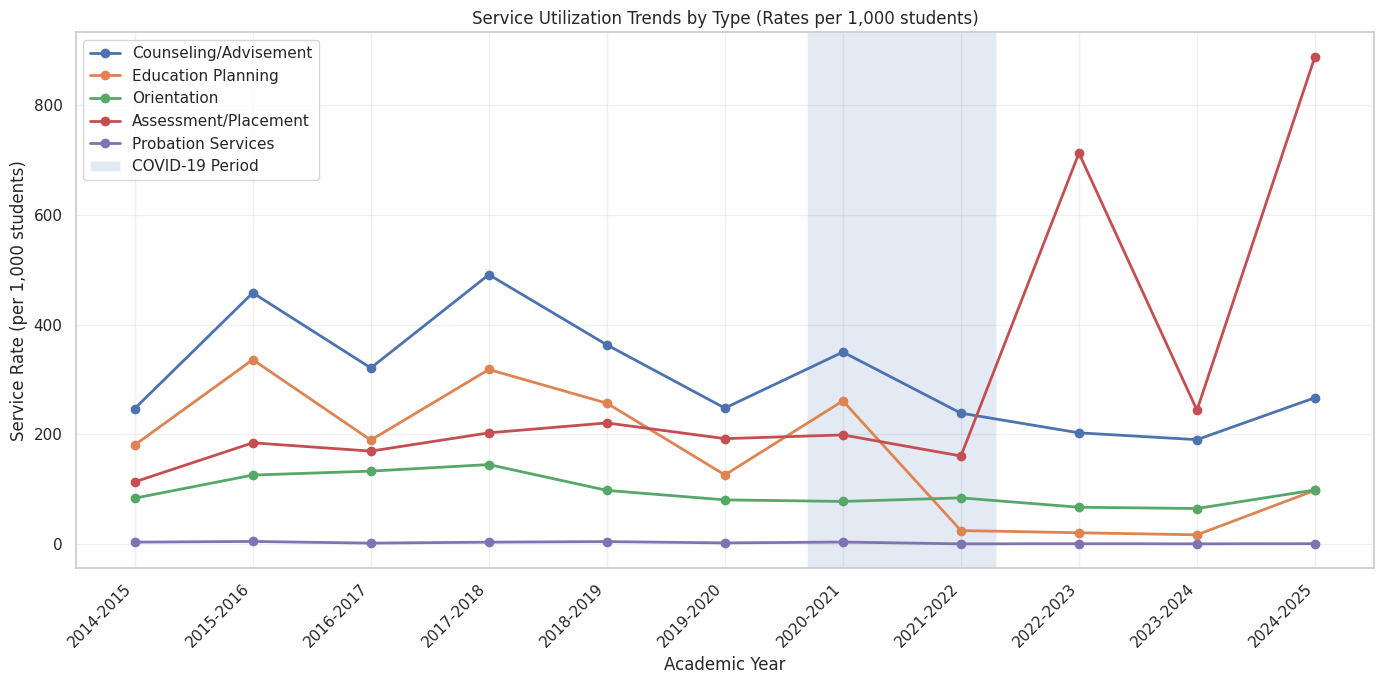


SUMMARY STATS (rates per 1,000 students)
                        mean    min    max
Counseling/Advisement  306.8  190.2  490.9
Education Planning     166.1   16.8  336.0
Orientation             96.1   64.7  144.8
Assessment/Placement   298.7  113.3  888.1
Probation Services       2.2    0.3    4.7


In [12]:
# 1) Service columns I want to compare
service_cols = [
    "counseling_rate",
    "ed_plan_rate",
    "orientation_rate",
    "assessment_rate",
    "probation_rate"
]

# 2) Friendly names for the legend
labels = {
    "counseling_rate": "Counseling/Advisement",
    "ed_plan_rate": "Education Planning",
    "orientation_rate": "Orientation",
    "assessment_rate": "Assessment/Placement",
    "probation_rate": "Probation Services"
}

# 3) Make the multi-line plot
plt.figure(figsize=(14, 7))

for col in service_cols:
    plt.plot(
        df["academic_year"],
        df[col],
        marker="o",
        linewidth=2,
        label=labels[col]
    )

# 4) Shade the COVID years (optional but helpful)
covid_years = ["2020-2021", "2021-2022"]
if all(y in list(df["academic_year"]) for y in covid_years):
    start = list(df["academic_year"]).index(covid_years[0])
    end = list(df["academic_year"]).index(covid_years[1])
    plt.axvspan(start - 0.3, end + 0.3, alpha=0.15, label="COVID-19 Period")

# 5) Chart labels and formatting
plt.title("Service Utilization Trends by Type (Rates per 1,000 students)")
plt.xlabel("Academic Year")
plt.ylabel("Service Rate (per 1,000 students)")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 6) Simple stats table (mean, min, max)
summary = df[service_cols].agg(["mean", "min", "max"]).T
summary.index = [labels[c] for c in summary.index]
summary = summary.round(1)

print("\nSUMMARY STATS (rates per 1,000 students)")
print(summary)




The multi-line chart shows clear differences in how students use each type of student success service over time. Counseling and Advisement is consistently the most utilized service across all years, which suggests it is the primary point of contact for students seeking support. Utilization of counseling declines noticeably during the COVID-19 period (2020–2021 and 2021–2022), which likely reflects both lower overall enrollment and the suspension of most in-person services during that time.

In contrast, Assessment and Placement displays highly erratic behavior compared to the other services. While its average utilization rate is similar to counseling, its year-to-year values fluctuate dramatically, with unusually large spikes in 2022–2023 and again in 2024–2025. These sharp increases are not observed in the other services, suggesting that the pattern may not reflect organic student demand alone. Possible explanations include changes in assessment policy, temporary mandates, data reporting delays, or back-filled submissions rather than a true surge in student participation. This anomaly requires further investigation, and follow-up with the Research Department is necessary to determine whether institutional policy changes or reporting issues contributed to these spikes.

Education Planning and Orientation show more moderate and stable patterns, with noticeable declines during COVID and gradual recovery afterward. Probation Services remain consistently low throughout the period, which is expected given the smaller population of students placed on probation.

### Program Awards Trend

I want to understand the awards trends since this is critical since program completions are my primary outcome variable. By showing both raw coutns and normalized rates, I can see if total awards are increasing or decreasing over time. I can also determine if changes are due to enrollment sifts or actual completion rate changes. I also want to identify if award rates improved during periods of enrollment decline and lastly, assess the impact of COVID-19 on student completions.

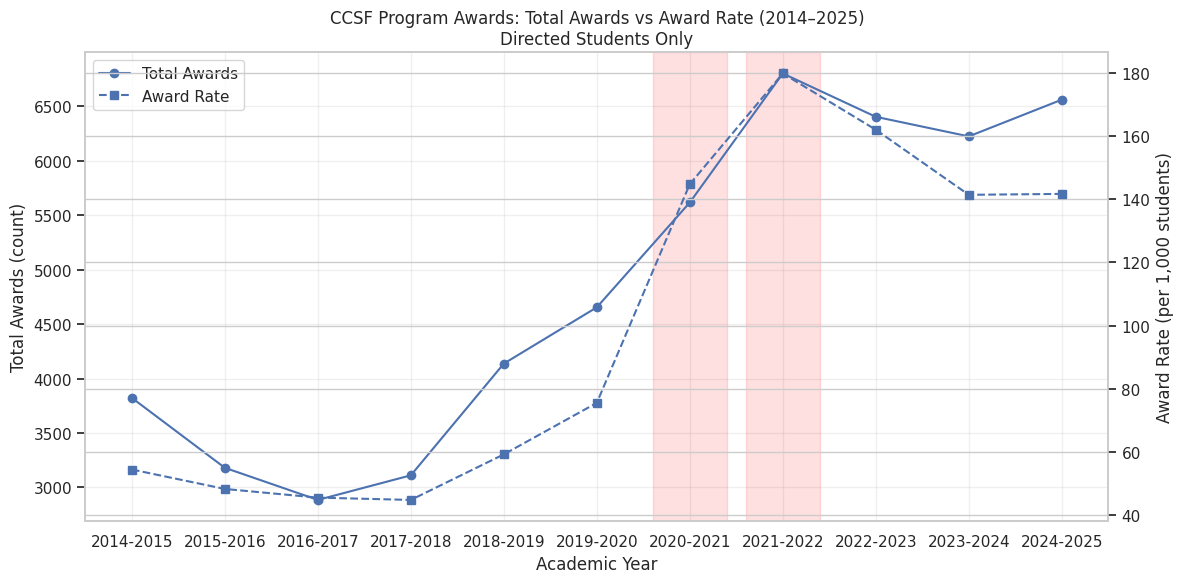

In [13]:
# 1) Create the plot area
fig, ax1 = plt.subplots(figsize=(12, 6))

#  2) Line 1: Total Awards (raw count) 
ax1.plot(df["academic_year"], df["total_awards"], marker="o", label="Total Awards")
ax1.set_ylabel("Total Awards (count)")
ax1.set_xlabel("Academic Year")
ax1.grid(True, alpha=0.3)

#  3) Second axis: Award Rate (per 1,000 students) 
ax2 = ax1.twinx()
ax2.plot(df["academic_year"], df["award_rate"], marker="s", linestyle="--", label="Award Rate")
ax2.set_ylabel("Award Rate (per 1,000 students)")

#  4) Highlight COVID years 
covid_years = ["2020-2021", "2021-2022"]
for year in covid_years:
    if year in df["academic_year"].values:
        x = df.index[df["academic_year"] == year][0]
        ax1.axvspan(x - 0.4, x + 0.4, color="red", alpha=0.12)

#  5) Title + x labels 
plt.title("CCSF Program Awards: Total Awards vs Award Rate (2014–2025)\nDirected Students Only")
plt.xticks(rotation=45)

#  6) One combined legend (simple way) 
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()


This figure is one of the most important visualizations in my analysis because program completions are my primary outcome variable. The chart displays both raw program award counts and award rates per 1,000 students, which allows me to distinguish between changes driven by enrollment size and changes in actual completion behavior.

Plotting the normalized award rate is especially important because CCSF experienced substantial enrollment fluctuations during the study period, particularly during COVID-19. By examining both measures simultaneously, I can assess whether observed changes in completions reflect shifts in student participation or true changes in completion efficiency.

The graph shows a clear disruption during the COVID-19 years (2020–2022). While enrollment declined sharply during this period, both the raw award count and the award rate increased significantly, peaking in 2021–2022. For example, CCSF awarded more than 6,500 program completions in 2021–2022, alongside the highest award rate observed in the entire time series.

This pattern initially appeared counterintuitive, prompting me to verify the data source. After reviewing the California Community Colleges DataMart, I confirmed that CCSF awarded 6,802 total program awards in 2021–2022, validating the accuracy of the dataset. These awards include a wide range of outcomes, such as associate degrees for transfer, associate degrees, credit certificates, and a substantial number of noncredit certificates and adult education awards.

The elevated completion levels during COVID-19 therefore appear to be real rather than a data error. Possible explanations include accelerated completions, increased short-term and noncredit awards, policy flexibility during the pandemic, or students completing programs despite lower overall enrollment. This finding highlights why normalization is essential: while raw counts reflect volume, award rates reveal that student completions became more concentrated during periods of enrollment decline.

Overall, this visualization confirms that program completions at CCSF are influenced not only by enrollment size but also by institutional and contextual factors—particularly during periods of disruption such as COVID-19.

### Service vs Awards Relationships


This visual analysis explores how student support service utilization relates to program completion rates. Scatter plots with fitted trend lines are used to:

1. Examine whether higher service utilization is associated with higher completion rates

2. Identify positive, negative, or negligible relationships by service type

3. Detect anomalous years that deviate from overall patterns

4. Visually assess relationship strength prior to formal statistical modeling

5. Inform feature selection for subsequent predictive models

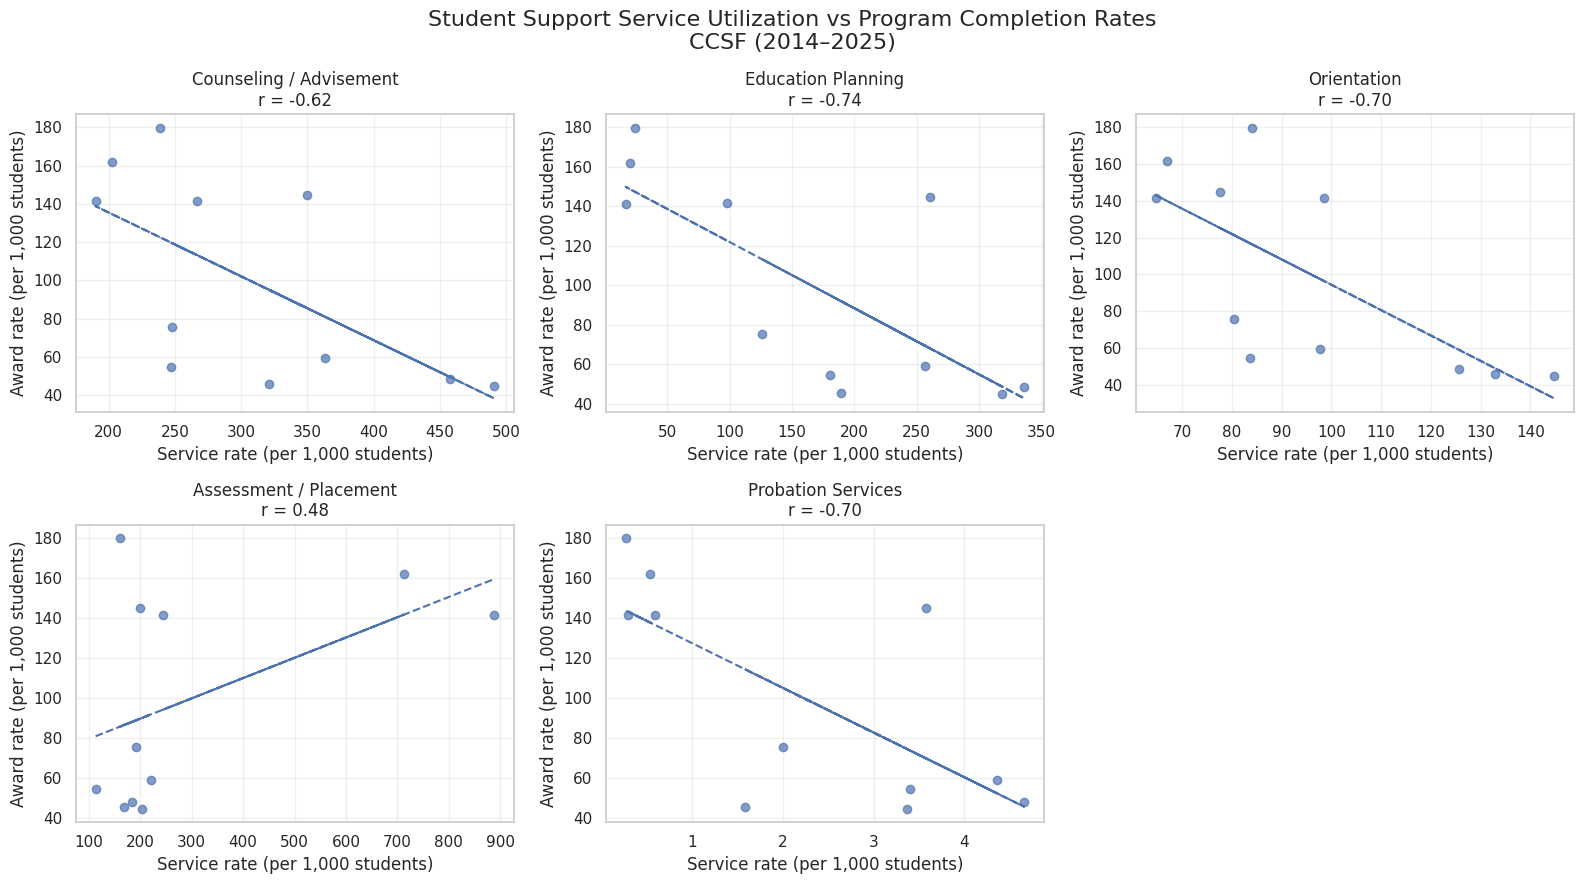

In [14]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

services = {
    "counseling_rate": "Counseling / Advisement",
    "ed_plan_rate": "Education Planning",
    "orientation_rate": "Orientation",
    "assessment_rate": "Assessment / Placement",
    "probation_rate": "Probation Services"
}

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()

for i, (col, label) in enumerate(services.items()):
    x = df[col]
    y = df["award_rate"]

    slope, intercept, r, p, _ = linregress(x, y)

    axes[i].scatter(x, y, alpha=0.7)
    axes[i].plot(x, slope*x + intercept, linestyle="--")

    axes[i].set_title(f"{label}\nr = {r:.2f}")
    axes[i].set_xlabel("Service rate (per 1,000 students)")
    axes[i].set_ylabel("Award rate (per 1,000 students)")
    axes[i].grid(alpha=0.3)

axes[-1].axis("off")

fig.suptitle(
    "Student Support Service Utilization vs Program Completion Rates\nCCSF (2014–2025)",
    fontsize=16
)

plt.tight_layout()
plt.show()


Pearson correlation (r) is used to explicitly visualize and quantify linear trends because it is designed to measure the strength and direction of a linear relationship between two continuous numeric variables. In this analysis, service utilization rates are continuous variables measured per 1,000 students, and program award rates are also continuous variables measured per 1,000 students. Pearson correlation allows us to assess whether increases in service utilization tend to correspond with increases or decreases in program completion rates.

The scatter plots with fitted trend lines reveal that most student support services exhibit moderate to strong negative correlations with program completion rates, reflecting their role as early-stage or remedial interventions. An important exception is Assessment and Placement, which shows a moderate positive correlation (r = 0.48). This suggests that as assessment and placement rates increase, completion rates also tend to rise, possibly because accurate placement helps students enroll in appropriate courses, avoid excess remediation, and persist through their programs to completion. However, the observed negative correlations for services such as Education Planning, Orientation, Counseling/Advisement, and Probation Services should not be interpreted as evidence that these services are ineffective. Rather, they indicate that these services are often deployed in response to student need and academic risk, rather than functioning as completion-stage interventions.

## Regression as a baseline model

To examine how changes in student support service utilization rates relate to changes in program award rates over time while holding enrollment constant, a multiple linear regression model is used as the baseline approach. The model is estimated using all available annual observations, given the small sample size, and overall model performance is evaluated using the coefficient of determination (R²)

In [15]:
import pandas as pd
import statsmodels.api as sm

# Load annual master dataset
df = pd.read_csv("master_dataset_annual.csv")

# Select predictors and target
features = [
    "probation_rate",
    "orientation_rate",
    "counseling_rate",
    "assessment_rate",
    "ed_plan_rate"
]

X = df[features]
y = df["award_rate"]

# Add intercept
X = sm.add_constant(X)

# Fit multiple linear regression
model = sm.OLS(y, X).fit()

# Display results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             award_rate   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     7.837
Date:                Sat, 20 Dec 2025   Prob (F-statistic):             0.0206
Time:                        12:33:53   Log-Likelihood:                -46.889
No. Observations:                  11   AIC:                             105.8
Df Residuals:                       5   BIC:                             108.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              202.7908     65.681  

A multiple linear regression model was fit using least-squares estimation, consistent with the linear regression methods introduced in Module 7. The baseline multiple linear regression explains a substantial proportion of the variation in program award rates (R² = 0.887; adjusted R² = 0.774), indicating that student support service utilization rates are collectively associated with completion outcomes. The overall model is statistically significant (p = 0.0206), despite the small sample size. Orientation services show a statistically significant negative association with award rates, consistent with their role as early-stage interventions serving new students. Counseling services exhibit a positive association with completions, though the estimate is marginally significant. Other services, including assessment, education planning, and probation support, do not show statistically significant same-year effects, likely due to multicollinearity and differing time horizons of impact. Taken together, these findings support the use of lagged and longitudinal modeling approaches rather than single-year causal interpretations.